## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape[-1]

3072

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
sgd = keras.optimizers.SGD()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 95us/step - loss: 2.0780 - accuracy: 0.2569 - val_loss: 1.9744 - val_accuracy: 0.2903
Epoch 2/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.8927 - accuracy: 0.3364 - val_loss: 1.8659 - val_accuracy: 0.3405
Epoch 3/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.8199 - accuracy: 0.3614 - val_loss: 1.8154 - val_accuracy: 0.3542
Epoch 4/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.7698 - accuracy: 0.3775 - val_loss: 1.7627 - val_accuracy: 0.3671
Epoch 5/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.7370 - accuracy: 0.3896 - val_loss: 1.7293 - val_accuracy: 0.3915
Epoch 6/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.7032 - accuracy: 0.3988 - val_loss: 1.7187 - val_accuracy: 0.3982
Epoch 7/500
50000/50000 [==============================] - 5s 

Epoch 56/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2026 - accuracy: 0.5785 - val_loss: 1.5550 - val_accuracy: 0.4627
Epoch 57/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.1980 - accuracy: 0.5813 - val_loss: 1.4369 - val_accuracy: 0.4970
Epoch 58/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1886 - accuracy: 0.5844 - val_loss: 1.3926 - val_accuracy: 0.5060
Epoch 59/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.1828 - accuracy: 0.5858 - val_loss: 1.3592 - val_accuracy: 0.5247
Epoch 60/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1753 - accuracy: 0.5882 - val_loss: 1.4786 - val_accuracy: 0.4771
Epoch 61/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.1708 - accuracy: 0.5897 - val_loss: 1.4439 - val_accuracy: 0.4867
Epoch 62/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1674 - accuracy: 0.5899

Epoch 111/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.8977 - accuracy: 0.6916 - val_loss: 1.4519 - val_accuracy: 0.5080
Epoch 112/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.9078 - accuracy: 0.6847 - val_loss: 1.4391 - val_accuracy: 0.5147
Epoch 113/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.8867 - accuracy: 0.6927 - val_loss: 1.4172 - val_accuracy: 0.5286
Epoch 114/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8900 - accuracy: 0.6912 - val_loss: 1.5228 - val_accuracy: 0.4936
Epoch 115/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8936 - accuracy: 0.6882 - val_loss: 1.4598 - val_accuracy: 0.5073
Epoch 116/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.8781 - accuracy: 0.6945 - val_loss: 1.4237 - val_accuracy: 0.5235
Epoch 117/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8744 - accurac

50000/50000 [==============================] - 4s 90us/step - loss: 0.6397 - accuracy: 0.7805 - val_loss: 1.6058 - val_accuracy: 0.5204
Epoch 166/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6308 - accuracy: 0.7852 - val_loss: 1.4679 - val_accuracy: 0.5409
Epoch 167/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6274 - accuracy: 0.7858 - val_loss: 1.6817 - val_accuracy: 0.5113
Epoch 168/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6215 - accuracy: 0.7857 - val_loss: 1.7464 - val_accuracy: 0.4966
Epoch 169/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6139 - accuracy: 0.7908 - val_loss: 1.6091 - val_accuracy: 0.5109
Epoch 170/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.6167 - accuracy: 0.7887 - val_loss: 1.7920 - val_accuracy: 0.4656
Epoch 171/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6034 - accuracy: 0.7973 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3965 - accuracy: 0.8721 - val_loss: 2.1378 - val_accuracy: 0.4778
Epoch 221/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3988 - accuracy: 0.8687 - val_loss: 1.8123 - val_accuracy: 0.5170
Epoch 222/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3690 - accuracy: 0.8804 - val_loss: 1.9438 - val_accuracy: 0.5117
Epoch 223/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3538 - accuracy: 0.8877 - val_loss: 1.9154 - val_accuracy: 0.5086
Epoch 224/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3911 - accuracy: 0.8750 - val_loss: 1.8351 - val_accuracy: 0.5303
Epoch 225/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3828 - accuracy: 0.8747 - val_loss: 1.8549 - val_accuracy: 0.5219
Epoch 226/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3564 - accuracy:

50000/50000 [==============================] - 4s 88us/step - loss: 0.2763 - accuracy: 0.9275 - val_loss: 2.2442 - val_accuracy: 0.5177
Epoch 275/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1856 - accuracy: 0.9504 - val_loss: 2.2765 - val_accuracy: 0.5242
Epoch 276/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2022 - accuracy: 0.9456 - val_loss: 2.1948 - val_accuracy: 0.5303
Epoch 277/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2561 - accuracy: 0.9319 - val_loss: 2.3103 - val_accuracy: 0.5160
Epoch 278/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1890 - accuracy: 0.9500 - val_loss: 2.0978 - val_accuracy: 0.5369
Epoch 279/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1471 - accuracy: 0.9629 - val_loss: 2.1331 - val_accuracy: 0.5333
Epoch 280/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1719 - accuracy: 0.9554 - val_

Epoch 329/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1460 - accuracy: 0.9659 - val_loss: 2.3721 - val_accuracy: 0.5089
Epoch 330/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0723 - accuracy: 0.9877 - val_loss: 2.4587 - val_accuracy: 0.5392
Epoch 331/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0538 - accuracy: 0.9935 - val_loss: 2.4581 - val_accuracy: 0.5358
Epoch 332/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0523 - accuracy: 0.9938 - val_loss: 2.4725 - val_accuracy: 0.5394
Epoch 333/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0535 - accuracy: 0.9924 - val_loss: 2.4635 - val_accuracy: 0.5368
Epoch 334/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0471 - accuracy: 0.9951 - val_loss: 2.5545 - val_accuracy: 0.5312
Epoch 335/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0506 - accuracy:

50000/50000 [==============================] - 4s 88us/step - loss: 0.0240 - accuracy: 0.9987 - val_loss: 2.7433 - val_accuracy: 0.5383
Epoch 384/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0237 - accuracy: 0.9986 - val_loss: 2.7470 - val_accuracy: 0.5405
Epoch 385/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0232 - accuracy: 0.9987 - val_loss: 2.7692 - val_accuracy: 0.5407
Epoch 386/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0221 - accuracy: 0.9988 - val_loss: 2.8522 - val_accuracy: 0.5227
Epoch 387/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0217 - accuracy: 0.9989 - val_loss: 2.7734 - val_accuracy: 0.5399
Epoch 388/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.0206 - accuracy: 0.9992 - val_loss: 2.7937 - val_accuracy: 0.5390
Epoch 389/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0202 - accuracy: 0.9991 - val_

50000/50000 [==============================] - 4s 89us/step - loss: 0.0130 - accuracy: 0.9998 - val_loss: 2.9654 - val_accuracy: 0.5369
Epoch 438/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0128 - accuracy: 0.9998 - val_loss: 2.9473 - val_accuracy: 0.5418
Epoch 439/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0125 - accuracy: 0.9998 - val_loss: 2.9552 - val_accuracy: 0.5408
Epoch 440/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0123 - accuracy: 0.9999 - val_loss: 2.9782 - val_accuracy: 0.5384
Epoch 441/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0123 - accuracy: 0.9998 - val_loss: 2.9792 - val_accuracy: 0.5379
Epoch 442/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0120 - accuracy: 0.9998 - val_loss: 2.9874 - val_accuracy: 0.5382
Epoch 443/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0119 - accuracy: 0.9998 - val_

Epoch 492/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 3.2032 - val_accuracy: 0.5393
Epoch 493/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0067 - accuracy: 0.9999 - val_loss: 3.2023 - val_accuracy: 0.5392
Epoch 494/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.2096 - val_accuracy: 0.5408
Epoch 495/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.2188 - val_accuracy: 0.5394
Epoch 496/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.2217 - val_accuracy: 0.5389
Epoch 497/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.2225 - val_accuracy: 0.5414
Epoch 498/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0064 - accuracy:

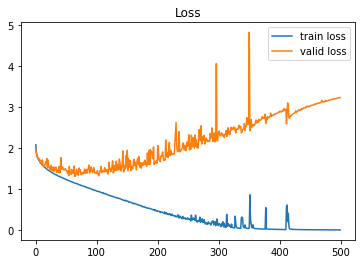

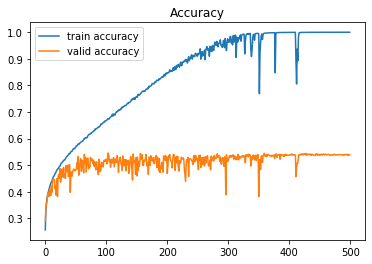

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()